# HotDog or NotHotDog

This is the code used during a hackathon with General Assembly. The data for the project comes from [Kaggle](https://www.kaggle.com/yashvrdnjain/hotdognothotdog).


![Jian-Yang](./assets/jian_yang_hbo_silicon_valley.0.jpeg)


In [2]:
# Suppressing deprecation warning
import warnings
warnings.filterwarnings('ignore')

# imports. Gotta bring some mates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

### Uncomment the below for using Tensorflow

In [ ]:
# from tensorflow.keras.preprocessing import image_dataset_from_directory
# import tensorflow as tf
# from tensorflow.keras import layers

In [4]:
# create list
hotdog = []
# define filepath for HotDog class
hotdog_path = './data/train/hotdog/'

# convert each image to normalized array and store
for file in os.listdir(hotdog_path):
    #print(file)
    #print(dog_path+file)
    try:
        # target_size automatically resizes each img on import
        hotdoggy = load_img(hotdog_path + file, target_size=(256, 256))
        hotdog_arr = img_to_array(hotdoggy) / 255
        hotdog.append(hotdog_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(hotdog)} pictures converted.')    

1500 pictures converted.


In [5]:
# create list
not_hotdog = []
# define filepath for HotDog class
not_hotdog_path = './data/train/nothotdog/'

# convert each image to normalized array and store
for file in os.listdir(not_hotdog_path):
    #print(file)
    #print(dog_path+file)
    try:
        # target_size automatically resizes each img on import
        notdoggy = load_img(not_hotdog_path + file, target_size=(256, 256))
        notdog_arr = img_to_array(notdoggy) / 255
        not_hotdog.append(notdog_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(not_hotdog)} pictures converted.')    

1500 pictures converted.


In [6]:
# X should contain both pictures of scrumptious hot dogs, and far less scrumptious not hot dogs
X = hotdog + not_hotdog
# convert to array and check shape
X = np.array(X)
print(f'X shape: {X.shape}')

# 0 for hotdog, 1 for not hotdog
y = [1] * 1500 + [0] * 1500 

# convert to array and check shape
y = np.array(y)
print(f'y shape: {y.shape}')

X shape: (3000, 256, 256, 3)
y shape: (3000,)


### Train-test splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.shape

(2250, 256, 256, 3)

In [9]:
X_train[0].shape

(256, 256, 3)

In [10]:
y_train.shape

(2250,)

## Convolutional Neural Networks

CNNs do some complicated math up front to represent images more effectively and in a way that generalizes, allowing us to learn far fewer parameters in later layers.

A CNN will generally consist of three types of layers:

- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

<img src="images/cnn.jpeg" alt="drawing" width="600"/>

[Image source.](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

### Convolution Layers

The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, like edges.

<img src="images/convolution.gif" alt="drawing" width="550"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

Our hyperparameters here are:
- the number of filters to use
- the dimensions of the filter

**How many filters should we use?** Well, this is a hyperparameter. There's not one great answer, but the idea is that each filter can detect one type of feature in an image (like vertical edges). This may depend on the complexity of your images (simpler images require fewer filters) and usually requires trial and error to identify an adequate value of `filters`. [Source](https://stats.stackexchange.com/questions/196646/what-is-the-significance-of-the-number-of-convolution-filters-in-a-convolutional)

### Pooling Layer

Remember that CNNs learn far fewer parameters than a regular feed-forward neural network. Most of the "parameter reduction" comes from the pooling layer.

<img src="images/maxpool.png" alt="drawing" width="400"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

In Max Pooling, we pass a filter over an image. At each step, we take the maximum value and record it as part of the output.
- Average Pooling exists, but is far less frequently used. [Andrew Ng](https://www.deeplearning.ai/deep-learning-specialization/) recommends using Max Pooling.
- When pooling, we generally partition the result from the previous layer. That is, the filter does not usually overlap like it does in the convolutional layer.

Our hyperparameters here are the **dimensions of the filter we use when pooling**. This is given by `pool_size = (2, 2)` in our example.

##### Why use max pooling?
1. Reduces the data dimensionality.
2. Protects against overfitting by creating a more abstract representation.
3. Provides some invariance by ignoring insignificant local changes in the image.

### Densely-Connected Layer
The densely-connected layer is the exact same as in a normal feed-forward neural network, so we won't spend any time talking about that, **except: remember to pass a `Flatten()` layer before a `Dense()` layer!**

In [11]:
# TODO: add early stopping 

input_shape = (256,256,3)
model = Sequential()

# conv, pool 
# 64 filters, (3,3) will need to tune these hyperparameters later
# two rounds of feature selection! 
model.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))

# conv, pool
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# flatten/dense, dense layer needs the flat format because it can't handle a matrix
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# dense/output
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['acc'])

results = model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=10,
         batch_size=64)

Epoch 1/10
36/36 [==============================] - 109s 3s/step - loss: 2.6032 - acc: 0.5192 - val_loss: 0.6056 - val_acc: 0.7013
Epoch 2/10
36/36 [==============================] - 91s 3s/step - loss: 0.6380 - acc: 0.6513 - val_loss: 0.6075 - val_acc: 0.7000
Epoch 3/10
36/36 [==============================] - 89s 2s/step - loss: 0.5721 - acc: 0.7078 - val_loss: 0.6084 - val_acc: 0.6813
Epoch 4/10
36/36 [==============================] - 89s 2s/step - loss: 0.4631 - acc: 0.7958 - val_loss: 0.6178 - val_acc: 0.6987
Epoch 5/10
36/36 [==============================] - 89s 2s/step - loss: 0.3313 - acc: 0.8639 - val_loss: 0.6646 - val_acc: 0.6907
Epoch 6/10
36/36 [==============================] - 90s 3s/step - loss: 0.2094 - acc: 0.9284 - val_loss: 0.8287 - val_acc: 0.6760
Epoch 7/10
36/36 [==============================] - 90s 3s/step - loss: 0.1472 - acc: 0.9537 - val_loss: 0.9349 - val_acc: 0.6773
Epoch 8/10
36/36 [==============================] - 90s 3s/step - loss: 0.0699 - acc: 0.9

In [13]:
model.save('./assets/model')

INFO:tensorflow:Assets written to: ./assets/model/assets


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                15745088  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [15]:
model.predict(X_test[0:1])

array([[0.00059119]], dtype=float32)

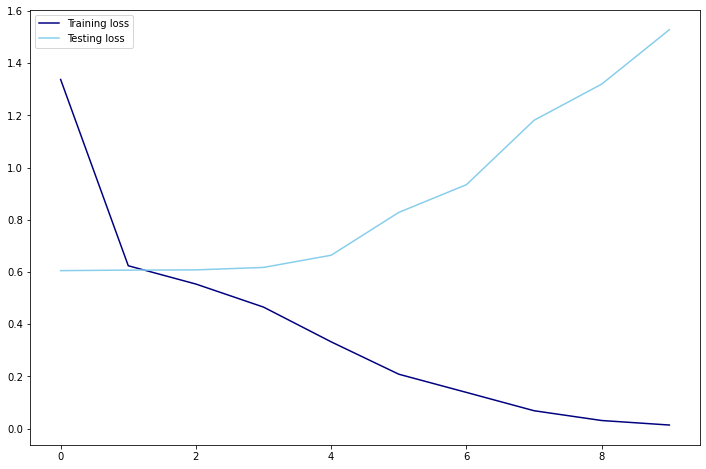

In [16]:
# Visualize the loss
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

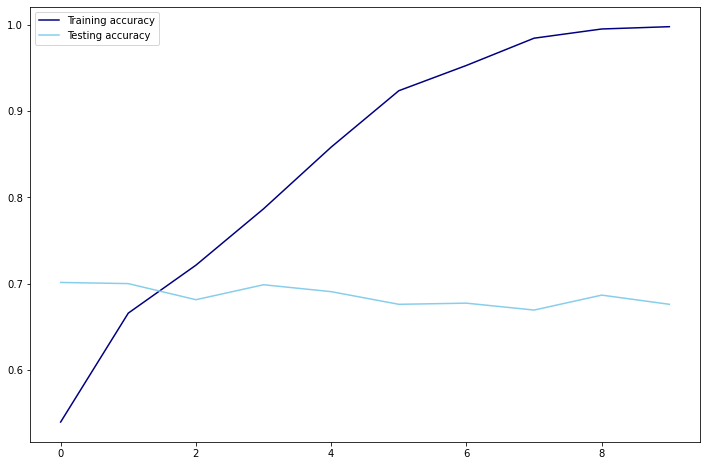

In [17]:
# Visualize the accuracy
train_acc = results.history['acc']
test_acc = results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training accuracy', color='navy')
plt.plot(test_acc, label='Testing accuracy', color='skyblue')
plt.legend();